In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("D:/Study/MCA/4th Sem/DA/csv/income.csv")
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [5]:
df.isnull()

,INCOME,SPEND
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

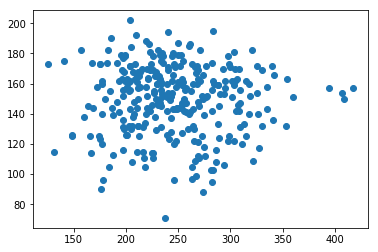

In [7]:
plt.scatter(df['INCOME'], df['SPEND'])

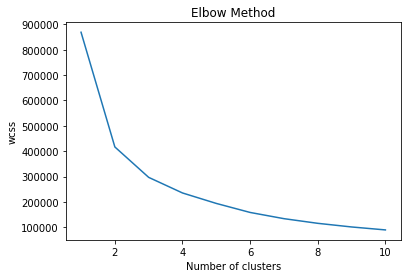

In [8]:
# No Y value (outcome variable) in unsupervised. All are independent variables
# To find optimal K
X = df[['INCOME', 'SPEND']]
wcss = [] # Within Cluster Sum of Squares
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X) # learning
    wcss.append(km.inertia_) # inertia_ = initialised
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
# Create Kmeans object
km = KMeans(n_clusters = 4)
# fit kmeans object to data
km.fit(X)
# print location of clusters learned by kmeans object
km.labels_

array([2, 2, 3, 2, 1, 3, 1, 2, 3, 3, 2, 0, 2, 3, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 0, 3, 1, 3, 3, 1, 3, 3, 3, 2, 0, 3, 3, 1, 2, 0, 1, 1, 2, 3, 0,
       1, 1, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 2, 3, 1, 0, 1, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 0, 2, 0, 3,
       3, 0, 2, 3, 2, 1, 3, 0, 1, 2, 1, 2, 2, 0, 3, 2, 3, 3, 0, 2, 2, 2,
       1, 3, 1, 3, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2, 3, 0, 3, 2,
       1, 2, 1, 2, 3, 3, 3, 0, 1, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 0,
       2, 3, 2, 3, 3, 2, 2, 1, 3, 3, 3, 0, 0, 2, 2, 3, 0, 2, 1, 2, 3, 3,
       2, 1, 3, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 3, 1, 3, 3, 0, 3, 1, 2, 2,
       0, 2, 3, 0, 0, 0, 3, 2, 2, 2, 3, 3, 2, 0, 3, 1, 2, 1, 0, 1, 0, 2,
       1, 3, 2, 0, 0, 3, 0, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2,
       3, 0, 3, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 3, 2, 2, 2, 2, 0, 2,
       3, 3, 1, 3, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 3, 3, 2, 3, 1,
       3, 2, 1, 3, 3, 1, 2, 3, 3, 3, 3, 3, 0, 0, 3,

In [10]:
# adding cluster labels into the dataframe
df['labels'] = km.labels_

In [11]:
df.head()

,INCOME,SPEND,labels
0,233,150,2
1,250,187,2
2,204,172,3
3,236,178,2
4,354,163,1


In [12]:
df['labels'].value_counts()

2    104
3     90
1     57
0     52
Name: labels, dtype: int64

In [13]:
# Creating a dataframe for testing the model
data = [[120, 30], [300, 100], [160, 14]]

# Create the pandas DataFrame
X_test = pd.DataFrame(data, columns = ['Income', 'Spend'])

# print dataframe
print(X_test)

   Income  Spend
0     120     30
1     300    100
2     160     14


In [14]:
km.predict(X_test)

array([3, 0, 3])

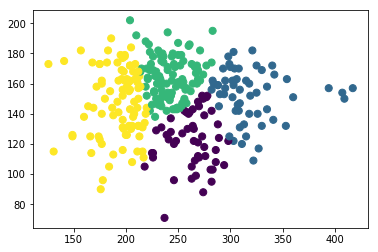

In [15]:
Y_pred = km.predict(X)
plt.scatter(df['INCOME'], df['SPEND'], c = df['labels'], s = 50)

In [16]:
# To know which all columns are cluster 1
df.index[df['labels'] == 1].tolist()

[4,
 6,
 14,
 16,
 25,
 28,
 36,
 39,
 40,
 44,
 45,
 51,
 59,
 61,
 81,
 82,
 83,
 93,
 96,
 98,
 110,
 112,
 120,
 132,
 134,
 140,
 141,
 161,
 172,
 177,
 180,
 182,
 185,
 190,
 195,
 213,
 215,
 217,
 220,
 228,
 229,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 246,
 253,
 255,
 266,
 278,
 280,
 285,
 288,
 291]

# Agglomertive Clustering

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
df1 = pd.read_csv('D:/Study/MCA/4th Sem/DA/csv/income.csv')
X = df[['INCOME', 'SPEND']]
ag_cl = AgglomerativeClustering(n_clusters = 2)
ag_cl.fit(X)
ag_cl
ag_cl.labels_
df1['labels'] = ag_cl.labels_
df1['labels'].head()


0    0
1    0
2    1
3    0
4    0
Name: labels, dtype: int64

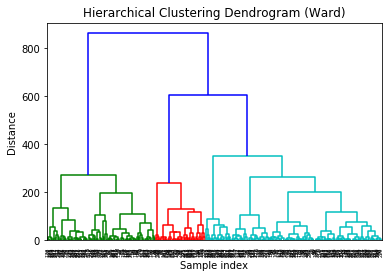

In [19]:
# from sklearn.cluster.hierarchical import plot_dendrogram
# from matplotlib import pyplot as plt
# plot_dendrogram(ag_cl)

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()